# Heart Disease Statistics

## Authors: Nicholas Tam, Hanxi Chen, Xinyang Deng, Levi Zeng

## Group: 4

In [1]:
# dummy

## 1. Introduction
### 1.1. Background Information
...

### 1.2. Dataset and Project Question
For our research project, we have selected datasets containing processed angiography data on patients in various clinics in 1988, applying a probability model derived from test results of 303 patients at the Cleveland Clinic in Cleveland, Ohio to generate and estimate results for the diagnosis of coronary heart disease (Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R., 1989). The datasets include the following patients undergoing angiography: 
- 303 patients at the Cleveland Clinic in Cleveland, Ohio (Original dataset for model) 
- 425 patients at the Hungarian Institute of Cardiology in Budapest, Hungary
- 200 patients at the Veterans Administration Medical Center in Long Beach, California 
- 143 patients from the University Hospitals in Zurich and Basel, Switzerland

These datasets were retrieved from the [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease) dataset from UCI machine learning repository, and converted from .data files to CSV files with Excel. The dataset obtained contains the following 14 attributes out of 76 attributes from the initial dataset for each patient: 

In [1]:
myTable <- data.frame(
  Variable = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"),
  Definition = c("Age", "Sex", "Chest pain type", "Resting blood pressure on admission to hospital", "Serum cholesterol", "Presence of high blood sugar", "Resting electrocardiographic results", "Maximum heart rate achieved", "Exercise induced angina", "ST depression induced by exercise relative to rest", "Slope of the peak exercise ST segment", "Number of major vessels coloured by fluoroscopy", "Presence of defect", "Diagnosis of heart disease"),
  Type = c("Numerical", "Categorical", "Categorical", "Numerical", "Numerical", "Categorical", "Categorical", "Numerical", "Categorical", "Numerical", "Categorical", "Numerical", "Categorical", "Categorical"),
  Unit = c("Years", "N/A", "N/A", "mmHg", "mg/dl", "N/A", "N/A", "BPM", "N/A", "N/A", "N/A", "N/A", "N/A", "N/A"),
  Categories = c("N/A", "0: Female; 1: Male", "1: Typical angina; 2: Atypical angina; 3: Non-anginal pain; 4: Asymptomatic", "N/A", "N/A", "0: False; 1: True", "0: Normal; 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria", "N/A", "0: No; 1: Yes", "N/A", "1: Upsloping; 2: Flat; 3: Downsloping", "Range from 1-3", "3: Normal; 6: Fixed defect; 7: Reversable defect", "0: < 50% diameter narrowing; 1: > 50% diameter narrowing")
)
myTable

Variable,Definition,Type,Unit,Categories
<chr>,<chr>,<chr>,<chr>,<chr>
age,Age,Numerical,Years,N/A
sex,Sex,Categorical,N/A,0: Female; 1: Male
cp,Chest pain type,Categorical,N/A,1: Typical angina; 2: Atypical angina; 3: Non-anginal pain; 4: Asymptomatic
trestbps,Resting blood pressure on admission to hospital,Numerical,mmHg,N/A
chol,Serum cholesterol,Numerical,mg/dl,N/A
fbs,Presence of high blood sugar,Categorical,N/A,0: False; 1: True
restecg,Resting electrocardiographic results,Categorical,N/A,0: Normal; 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach,Maximum heart rate achieved,Numerical,BPM,N/A
exang,Exercise induced angina,Categorical,N/A,0: No; 1: Yes


My project question is: 
#### "Given the sample data for angiography patients, is the correlation of cholesterol level with age the same between different locations?" 

Previous studies have indicated a positive correlation between cholesterol level and age, where total cholesterol levels steadily increase from age 20 to 65, followed by a slight decrease in men and a plateu in women (Beckett, N., Nunes, M., & Bulpitt, C., 2000). As such, gender may be a confounding variable for this this question. However, it is unclear how the locations of each clinic influence the change in cholesterol levels over age.

There are 4 separate datasets dependent on location, and thus can be modified to contain a new variable `location` indicating their respective location. However, the `chol` column for the Switzerland dataset does not contain any valid values, and thus the Switzerland dataset may need to be excluded. A multiple linear regression model can be applied with the `location`, `age`, and `chol` variables, allowing a prediction on the difference in correlation between cholesterol level and age between different locations. A/B testing can also be applied to compare the effect of variation in location on the required correlation.

Given the project question and the limitations of the given data, the following hypothesis test is to be conducted: 
- $H_0: \text{There is no significant difference in the correlation of cholesterol level with age between each location}$ 
- $H_1: \text{There is a significant difference in the correlation of cholesterol level with age between at least 1 pair of locations}$

<!-- Given the project question, let $\beta_{5}$ be the difference in reference line slope for Hungary compared to the reference line slope for Cleveland, and let $\beta_{6}$ be the difference in slope for the reference line for California compared to the reference line slope for Cleveland. The following hypothesis tests will be conducted: 

Hypothesis test 1:
- $H_0: \beta_{5} = 0$ 
- $H_1: \beta_{5} \neq 0$

Hypothesis test 2:
- $H_0: \beta_{6} = 0$ 
- $H_1: \beta_{6} \neq 0$ -->

## 2. Preliminary Results

### 2.1. Loading relevant libraries

In [2]:
# Imports

# install.packages("infer") # Install infer package for use

library(dplyr) # Data manipulation operations
library(gridExtra) # Extensions for grid system
library(tidyverse) # Better presentation of data
library(repr) # String and binary representations of objects for several formats / mime types 
# library(digest) 
library(lubridate) # Easier date organisation
library(infer) # Bootstrap distribution, confidence interval
library(broom) # Reorganises outputs into tidy tibbles
library(ggplot2) # Provides commands to create complex plots


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.2     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 2.2. Uploading and merging relevant tables

- Each data set is read separately, then merged into a single dataframe called `total_heart`, as shown in Table 1. 
- Before merging, the `location` column is created, to indicate the differing clinics that the probability model was applied to, including the clinic the model was derived from.
- The `sex`, `cp`, `trestbps`, `chol`, and `num` columns require a change in data type to be able to be used.

In [11]:
Cleveland_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project/main/heart%2Bdisease%2BModified/processed_Cleveland.csv") %>% 
    mutate(location = "Cleveland")
Hungary_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project/main/heart%2Bdisease%2BModified/processed_Hungarian.csv") %>% 
    mutate(location = "Hungary")
Switzerland_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project/main/heart%2Bdisease%2BModified/processed_Switzerland.csv") %>% 
    mutate(location = "Switzerland")
California_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project/main/heart%2Bdisease%2BModified/processed_VA.csv") %>% 
    mutate(location = "California")
total_heart <- rbind(Cleveland_heart, Hungary_heart, Switzerland_heart, California_heart) %>% 
    select(location, age, sex, cp, trestbps, chol, restecg, num) %>% 
    # filter_all(any_vars(. != "?")) %>% 
    # filter(!(chol == '0' | trestbps == '?'))
    filter(!(location == '?' | age == '?' | sex == '?' | cp == '?' | trestbps == '?' | trestbps == '0' | chol == '?' | chol == '0' | restecg == '?' | num == '?')) %>% 
    transform(sex = as.character(as.factor(sex)), cp = as.character(as.factor(cp)), trestbps = as.integer(as.factor(trestbps)), chol = as.integer(as.factor(chol)), num = as.character(as.factor(num)))

head(total_heart)
tail(total_heart)

,location,age,sex,cp,trestbps,chol,restecg,num
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,Cleveland,63,1,1,34,81,2,0
2,Cleveland,67,1,4,43,134,2,2
3,Cleveland,67,1,4,16,77,2,1
4,Cleveland,37,1,3,25,98,0,0
5,Cleveland,41,0,2,25,52,2,0
6,Cleveland,56,1,2,16,84,0,0


,location,age,sex,cp,trestbps,chol,restecg,num
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
669,California,53,1,4,33,147,1,3
670,California,62,1,4,42,21,1,1
671,California,46,1,4,27,156,0,2
672,California,54,0,4,22,173,1,1
673,California,55,1,4,17,71,1,2
674,California,62,1,2,16,102,2,1


_Table 1: Initial dataset for all required data_

In [27]:
table(total_heart$location, useNA = 'always')
table(total_heart$sex, useNA = 'always')


California  Cleveland    Hungary       <NA> 
       102        303        269          0 


   0    1 <NA> 
 175  499    0 

### 2.3. Exploratory Data Analysis

#### 2.3.1. Distribution of cholesterol levels
- Histograms have been selected to display the sampling distribution of cholesterol levels in each location for each gender, to allow easier observation of spread and centre of data.
<!-- - Outlier values that exceed ...$mg/dl$ have been omitted to allow a clearer display of the sample distribution. -->
- The low number of female results from California may lead to the data becoming heavily skewed.

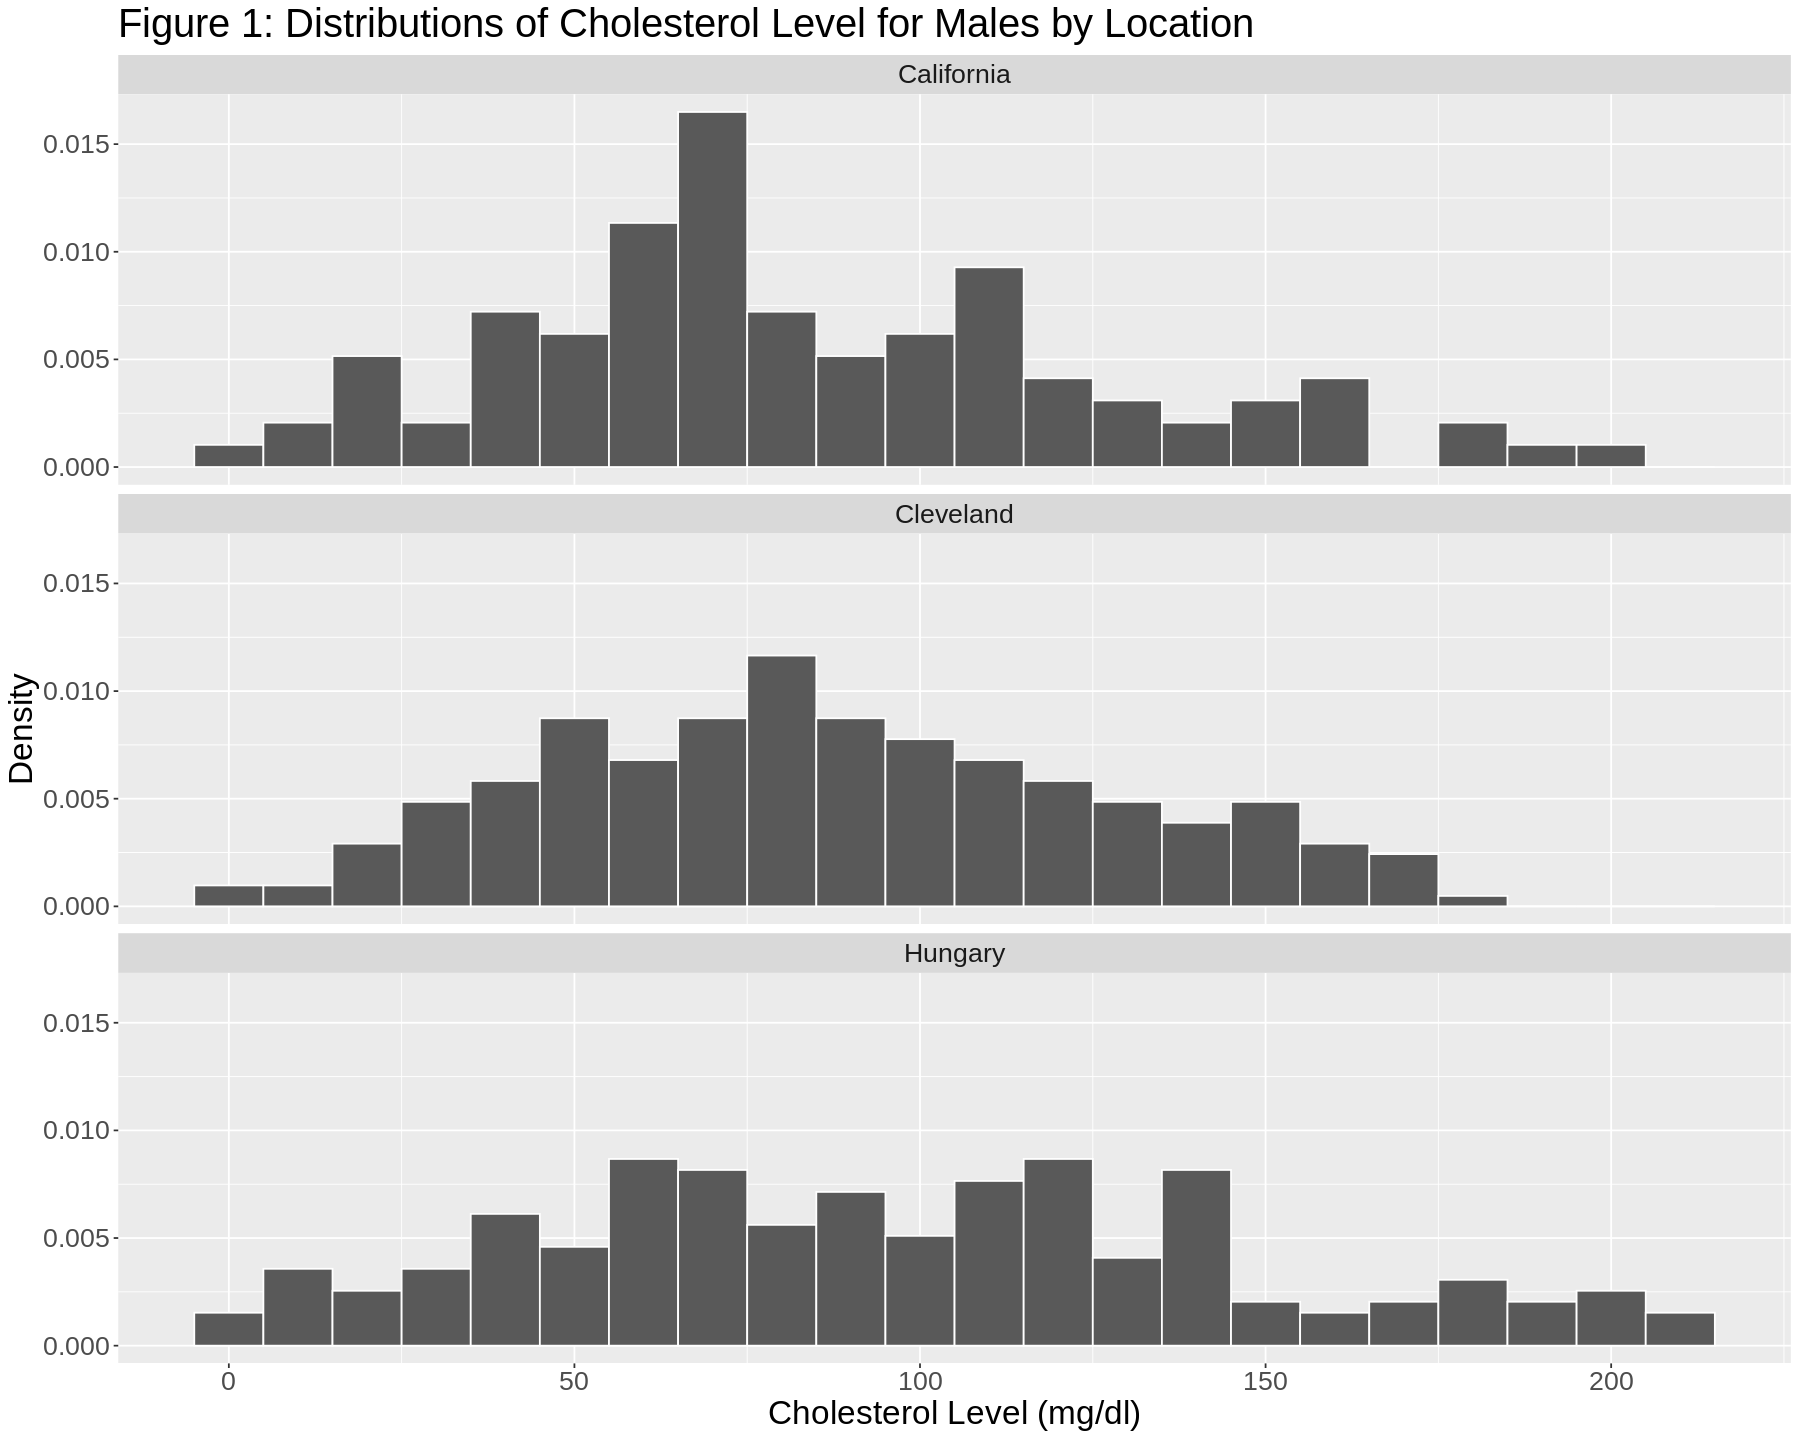

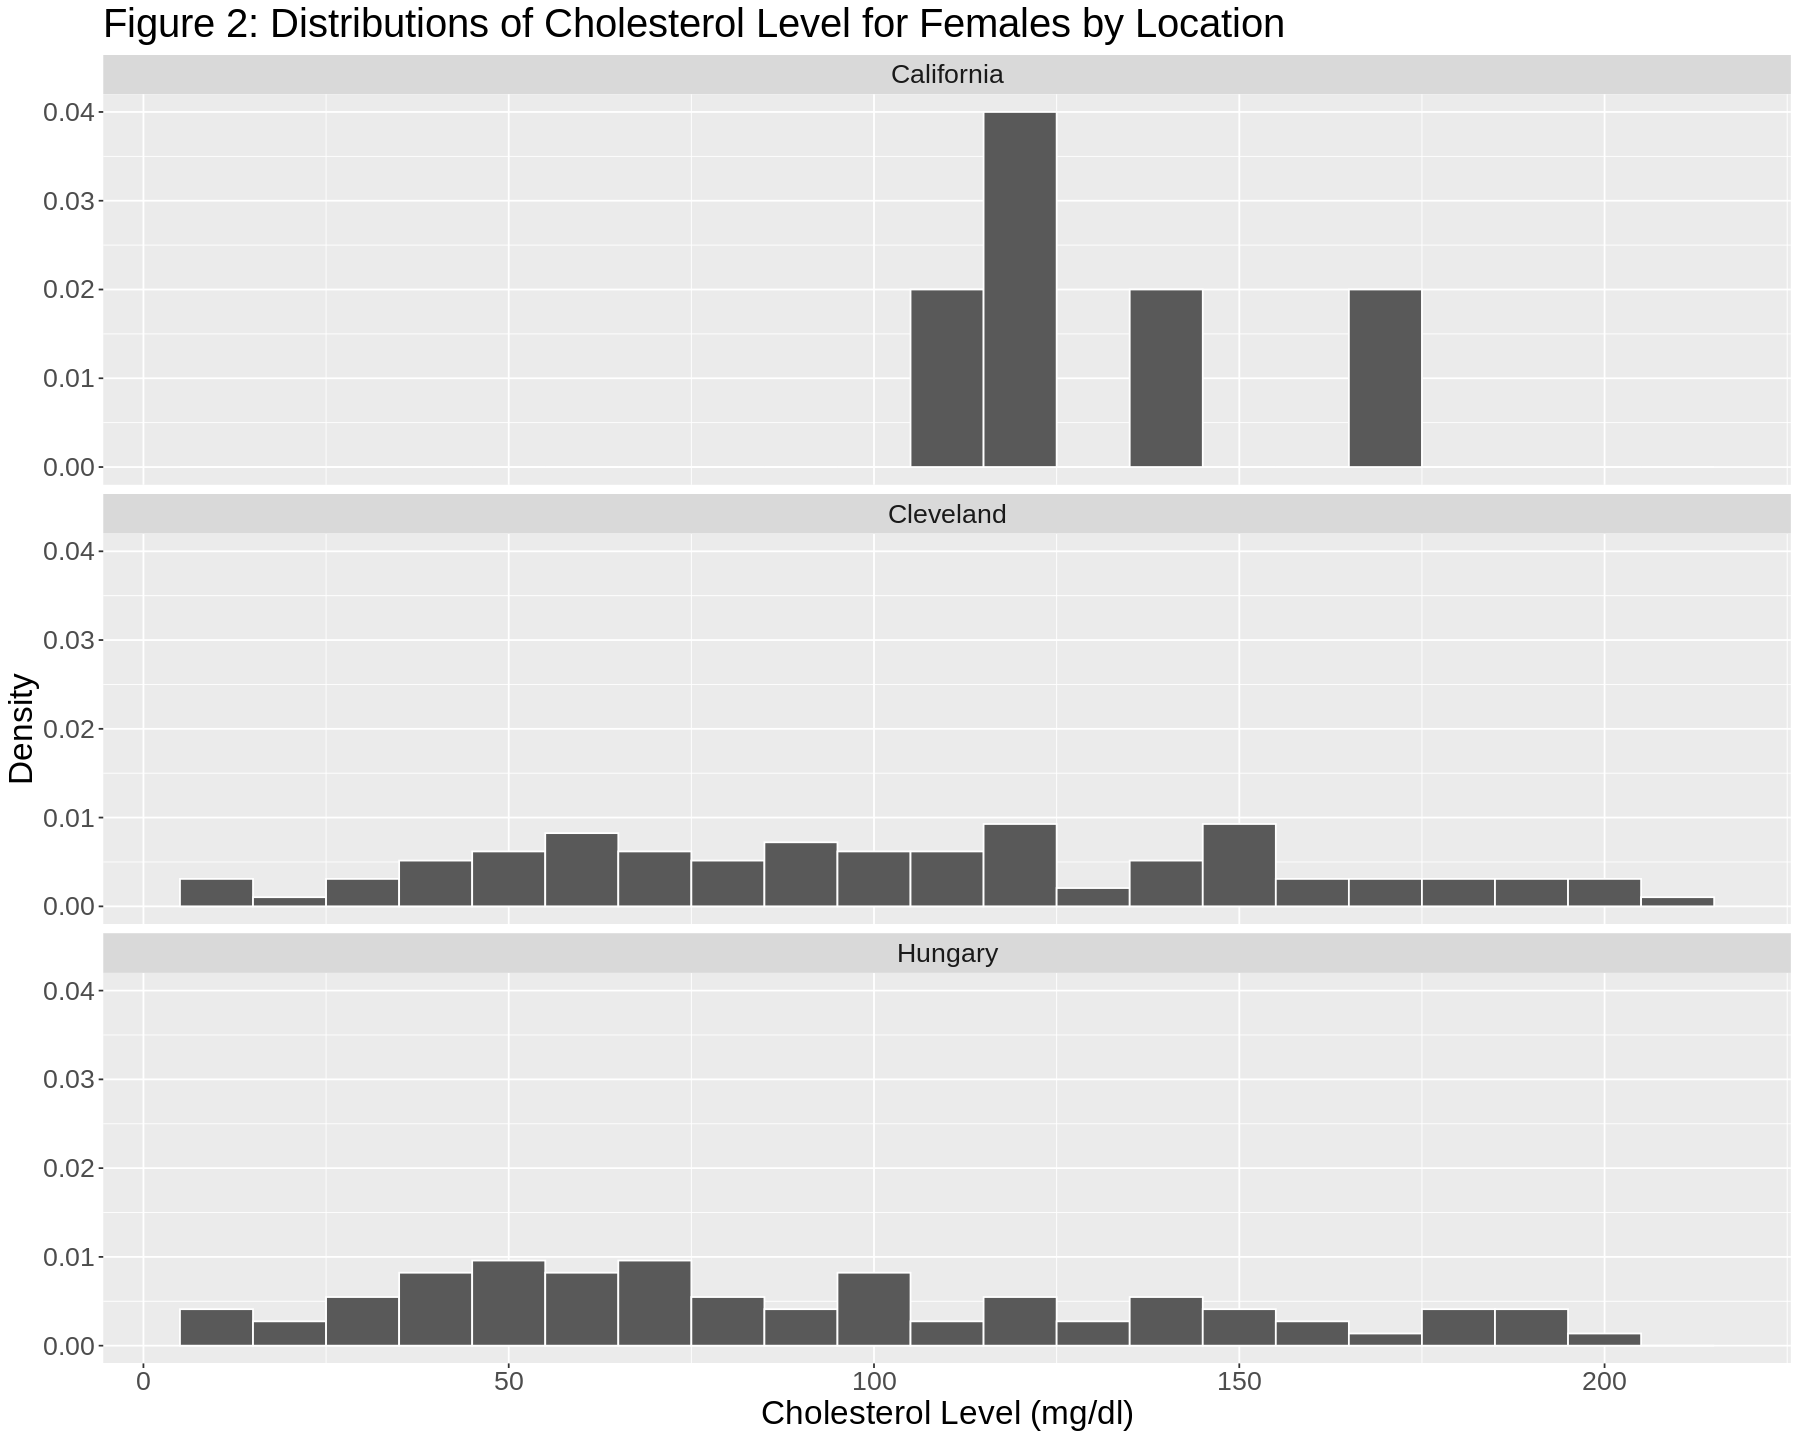

In [23]:
options(repr.plot.width = 15, repr.plot.height = 12)

# Distribution of cholesterol levels for males in each location 
dist_total_male <- total_heart %>% 
    filter(sex == 1) %>% 
    ggplot() + 
    geom_histogram(aes(x = chol, y = ..density..), color = 'white', binwidth = 10) +
    labs(x = "Cholesterol Level (mg/dl)", y = "Density") + 
    facet_wrap(~location, scales = "fixed", nrow = 5) +
    ggtitle("Figure 1: Distributions of Cholesterol Level for Males by Location") + 
    theme(text = element_text(size = 20)) 
# +
#     scale_x_continuous(limits = c(0, 225), breaks = seq(0, 225, by = 25)) + 
#     scale_y_continuous(limits = c(0, 0.015), breaks = seq(0, 0.025, by = 0.005))
dist_total_male

# # Distribution of cholesterol levels for females in each location 
dist_total_female <- total_heart %>% 
    filter(sex == 0) %>% 
    ggplot() + 
    geom_histogram(aes(x = chol, y = ..density..), color = 'white', binwidth = 10) +
    labs(x = "Cholesterol Level (mg/dl)", y = "Density") + 
    facet_wrap(~location, scales = "fixed", nrow = 5) + 
    ggtitle("Figure 2: Distributions of Cholesterol Level for Females by Location") + 
    theme(text = element_text(size = 20)) 
# +
#     scale_x_continuous(limits = c(0, 225), breaks = seq(0, 225, by = 25)) + 
#     scale_y_continuous(limits = c(0, 0.015), breaks = seq(0, 0.025, by = 0.005))
dist_total_female

- Distribution 
- Boxplot
- Mean, median, sd
- specify, generate, calculate
- Treat sex as potnetial confounding variable

### 2.4. Data on overall population
The data below consists of summary data for the overall population: 
- `total_heart_pop_data`: For each location and each year between 2013 and 2015, the mean (`heart_chol_mean`), standard deviation (`heart_chol_sd`), and median (`heart_chol_median`) of cholesterol level values, mean (`heart_age_mean`), standard deviation (`heart_age_sd`), and median (`heart_age_median`) of ages, and quantity (`n`) of patients are measured.
<!-- - `total_PM2.5_AV_diff_obs`: Contains test statistics for each hypothesis test.
    - `PM2.5_mean_diff_pt_est`: Differences in mean PM2.5 concentration between 2013 and 2015 as test statistics for hypothesis test 1 for each location.
    - `PM2.5_sd_diff_pt_est`: Differences in PM2.5 concentration standard deviation between 2013 and 2015 as test statistics for hypothesis test 2 for each location.
    - `PM2.5_mean_diff_se`: Standard error for sampling distribution of differences in mean PM2.5 concentration between 2013 and 2015. -->

In [29]:
# Count number of each combination of year and location
countPatients <- total_heart %>% 
    group_by(location, sex) %>%
    tally() 

# Obtaining point estimates for each combination of location and year
total_heart_pop_data <- total_heart %>% 
    # filter(year != 2014) %>% 
    group_by(location, sex) %>% 
    summarize(
        heart_chol_mean = mean(chol), 
        heart_chol_sd = sd(chol), 
        heart_chol_median = median(chol), 
        heart_age_mean = mean(age), 
        heart_age_sd = sd(age), 
        heart_age_median = median(age)
    ) %>% 
    inner_join(countPatients) 
total_heart_pop_data

`summarise()` has grouped output by 'location'. You can override using the
`.groups` argument.
Joining with `by = join_by(location, sex)`


location,sex,heart_chol_mean,heart_chol_sd,heart_chol_median,heart_age_mean,heart_age_sd,heart_age_median,n
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
California,0,134.00000,25.83602,124,56.80000,5.449771,54.0,5
California,1,83.88660,43.09217,73,59.78351,8.070299,60.0,97
Cleveland,0,104.59794,50.12207,102,55.72165,9.370546,57.0,97
Cleveland,1,87.74757,40.50829,83,53.83495,8.836838,54.5,206
Hungary,0,91.13699,51.67616,78,47.65753,7.652558,49.0,73
Hungary,1,96.53571,50.55318,94,47.78571,7.881494,48.5,196


## References
- Janosi, A., Steinbrunn, W., Pfisterer, M., &amp; Detrano, R. (1988, June 30). Heart disease. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease
- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J. J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American journal of cardiology, 64(5), 304–310. https://doi.org/10.1016/0002-9149(89)90524-9
- Beckett, N., Nunes, M., & Bulpitt, C. (2000). Is it advantageous to lower cholesterol in the elderly hypertensive?. Cardiovascular drugs and therapy, 14(4), 397–405. https://doi.org/10.1023/a:1007812232328